<a href="https://colab.research.google.com/github/tpcorreia/Master_AI_2023_UAX/blob/EDA-Training/EDA_Tema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
## Segunda Sesión
Trabajando distintas funciones con datos más complejos, sin tener todo el contexto

In [44]:
import numpy as np
import pandas as pd
import sqlite3

## Descargando los datos
Descargamos la bbdd de github y preparamos el entorno de python

In [45]:
# download the data to your colab copy
!wget https://github.com/jmpicaza/UAX_AI_master_2023/raw/main/data/house_prices_kaggle.db -O sample_data/house_prices_kaggle.db


--2024-01-08 18:55:25--  https://github.com/jmpicaza/UAX_AI_master_2023/raw/main/data/house_prices_kaggle.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jmpicaza/UAX_AI_master_2023/main/data/house_prices_kaggle.db [following]
--2024-01-08 18:55:26--  https://raw.githubusercontent.com/jmpicaza/UAX_AI_master_2023/main/data/house_prices_kaggle.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815104 (796K) [application/octet-stream]
Saving to: ‘sample_data/house_prices_kaggle.db’

sample_data/house_p 100%[===================>] 796.00K  --.-KB/s    in 0.03s   

2024-01-08 18:55:26 (30.8 MB/s) -

In [46]:
!pip install jupysql

In [47]:
# make a connection to sqlite db and use sql magic to focus in SQL
conn = sqlite3.connect('sample_data/house_prices_kaggle.db')
%load_ext sql
%sql conn
%config SqlMagic.autopandas = True

# pandas configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# data_table.enable_dataframe_formatter()
# data_table.disable_dataframe_formatter()

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Explore the tables and see the data
1. With SQL
2. With DataFrames

In [48]:
%%sql
select distinct name
from sqlite_master
where type = 'table'
order by name desc, tbl_name asc

Running query in 'Connection'

,name
0,train
1,test


In [49]:
%%sql
select * from train
limit 5

Running query in 'Connection'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [50]:
# leo la query con pandas
df = pd.read_sql_query("select * from train", conn)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [51]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [52]:
# en caso de que no lo fueran, combierto los tipo obj a str
#df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype(str)


In [53]:
# Summary statistics
df.describe(include=["object", "int", "float"])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [54]:
print("metricas de la variable en valor absoluto\n", df["BsmtFinType1"].value_counts())
print( )
print("metricas de la variable en %\n", df["BsmtFinType1"].value_counts(normalize=True))


metricas de la variable en valor absoluto
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

metricas de la variable en %
 Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64


In [55]:
df.sort_values(by="SalePrice", ascending=False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,None,None,None,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,None,None,None,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,None,None,None,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,None,None,None,0,1,2009,New,Partial,582933


In [56]:
df["SalePrice"].median()

163000.0

In [57]:
df[df["SaleType"] == "New"]["SalePrice"].median( )

247453.0

In [58]:
%%sql
select distinct BsmtFinType1,
    count(*) as cuantos,
    avg(SalePrice) as saleprice_mean,
    min(SalePrice) as saleprice_min,
    max(SalePrice) as saleprice_max
from train
group by BsmtFinType1
order by cuantos desc

Running query in 'Connection'

,BsmtFinType1,cuantos,saleprice_mean,saleprice_min,saleprice_max
0,Unf,430,170670.576744,37900,582933
1,GLQ,418,235413.720096,80000,755000
2,ALQ,220,161573.068182,81000,538000
3,BLQ,148,149493.655405,35311,359100
4,Rec,133,146889.248120,34900,381000
5,LwQ,74,151852.702703,75500,301000
6,None,37,105652.891892,39300,198500


In [59]:
# Inspect some values with loc
print(df.loc[0:5, "LotArea":"Utilities"])
df.loc[0:5, ["LotArea" , "Utilities"]]

   LotArea Street Alley LotShape LandContour Utilities
0     8450   Pave  None      Reg         Lvl    AllPub
1     9600   Pave  None      Reg         Lvl    AllPub
2    11250   Pave  None      IR1         Lvl    AllPub
3     9550   Pave  None      IR1         Lvl    AllPub
4    14260   Pave  None      IR1         Lvl    AllPub
5    14115   Pave  None      IR1         Lvl    AllPub


,LotArea,Utilities
0,8450,AllPub
1,9600,AllPub
2,11250,AllPub
3,9550,AllPub
4,14260,AllPub
5,14115,AllPub


In [60]:
# and now with iloc
#df.iloc[0:5, 4:10]
print(df.iloc[0:5, [4,9]])

   LotArea Utilities
0     8450    AllPub
1     9600    AllPub
2    11250    AllPub
3     9550    AllPub
4    14260    AllPub


In [61]:
# to review the last line (with or without the :'s)
df.iloc[-1:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,None,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,None,None,None,0,6,2008,WD,Normal,147500


In [62]:
# apply funcs to columns with apply
# df.apply(np.max)
df.apply(lambda x: np.percentile(x, q=[75, 50, 25]) if np.issubdtype(x.dtype, np.number) else None)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1095.25,70.0,None,NaN,11601.5,None,None,None,None,None,None,None,None,None,None,None,None,7.0,6.0,2000.0,2004.0,None,None,None,None,None,NaN,None,None,None,None,None,None,None,712.25,None,0.0,808.0,1298.25,None,None,None,None,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,None,7.0,None,1.0,None,None,NaN,None,2.0,576.0,None,None,None,168.0,68.0,0.0,0.0,0.0,0.0,None,None,None,0.0,8.0,2009.0,None,None,214000.0
1,730.50,50.0,None,NaN,9478.5,None,None,None,None,None,None,None,None,None,None,None,None,6.0,5.0,1973.0,1994.0,None,None,None,None,None,NaN,None,None,None,None,None,None,None,383.50,None,0.0,477.5,991.50,None,None,None,None,1087.00,0.0,0.0,1464.00,0.0,0.0,2.0,0.0,3.0,1.0,None,6.0,None,1.0,None,None,NaN,None,2.0,480.0,None,None,None,0.0,25.0,0.0,0.0,0.0,0.0,None,None,None,0.0,6.0,2008.0,None,None,163000.0
2,365.75,20.0,None,NaN,7553.5,None,None,None,None,None,None,None,None,None,None,None,None,5.0,5.0,1954.0,1967.0,None,None,None,None,None,NaN,None,None,None,None,None,None,None,0.00,None,0.0,223.0,795.75,None,None,None,None,882.00,0.0,0.0,1129.50,0.0,0.0,1.0,0.0,2.0,1.0,None,5.0,None,0.0,None,None,NaN,None,1.0,334.5,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,None,None,129975.0


In [63]:
columns_to_show = columns_num = df.select_dtypes(include=[np.number]).columns.to_list()
columns_to_show = ["YrSold", "SalePrice"]
#df.groupby(["BsmtFinType1"])[columns_to_show].describe(percentiles=[])
df.groupby(["BsmtFinType1"])[columns_to_show].describe(percentiles=[])



YrSold                                                SalePrice  \
              count         mean       std     min     50%     max     count   
BsmtFinType1                                                                   
ALQ           220.0  2007.786364  1.304994  2006.0  2008.0  2010.0     220.0   
BLQ           148.0  2007.864865  1.343407  2006.0  2008.0  2010.0     148.0   
GLQ           418.0  2007.947368  1.334689  2006.0  2008.0  2010.0     418.0   
LwQ            74.0  2007.837838  1.344976  2006.0  2008.0  2010.0      74.0   
Rec           133.0  2007.639098  1.310438  2006.0  2007.0  2010.0     133.0   
Unf           430.0  2007.716279  1.318141  2006.0  2008.0  2010.0     430.0   

                                                                        
                       mean           std      min       50%       max  
BsmtFinType1                                                            
ALQ           161573.068182  50821.277231  81000.0  149250.0  538000.0  
BLQ           149493.655405  47327.292126  35311.0  139100.0  359100.0  
GLQ           235413.720096  93215.613258  80000.0  213750.0  755000.0  
LwQ           151852.702703  50796.987083  75500.0  139000.0  301000.0  
Rec           146889.248120  45190.118879  34900.0  142000.0  381000.0  
Unf           170670.576744  72577.080129  37900.0  161750.0  582933.0

In [64]:
df.groupby(["BsmtFinType1"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

YrSold                            SalePrice                \
                     mean       std  amin  amax           mean           std   
BsmtFinType1                                                                   
ALQ           2007.786364  1.304994  2006  2010  161573.068182  50821.277231   
BLQ           2007.864865  1.343407  2006  2010  149493.655405  47327.292126   
GLQ           2007.947368  1.334689  2006  2010  235413.720096  93215.613258   
LwQ           2007.837838  1.344976  2006  2010  151852.702703  50796.987083   
Rec           2007.639098  1.310438  2006  2010  146889.248120  45190.118879   
Unf           2007.716279  1.318141  2006  2010  170670.576744  72577.080129   

                             
               amin    amax  
BsmtFinType1                 
ALQ           81000  538000  
BLQ           35311  359100  
GLQ           80000  755000  
LwQ           75500  301000  
Rec           34900  381000  
Unf           37900  582933

In [65]:
pd.crosstab(df["RoofStyle"], df["BsmtFinType1"], margins=True)

BsmtFinType1,ALQ,BLQ,GLQ,LwQ,Rec,Unf,All
RoofStyle,,,,,,,
Flat,2,2,4,3,0,1,12
Gable,170,113,319,58,96,357,1113
Gambrel,2,1,0,0,1,7,11
Hip,45,32,93,13,35,60,278
Mansard,1,0,0,0,1,5,7
Shed,0,0,2,0,0,0,2
All,220,148,418,74,133,430,1423


In [66]:
pd.crosstab(df["RoofStyle"], df["BsmtFinType1"], normalize=True)

BsmtFinType1,ALQ,BLQ,GLQ,LwQ,Rec,Unf
RoofStyle,,,,,,
Flat,0.001405,0.001405,0.002811,0.002108,0.000000,0.000703
Gable,0.119466,0.079410,0.224174,0.040759,0.067463,0.250878
Gambrel,0.001405,0.000703,0.000000,0.000000,0.000703,0.004919
Hip,0.031623,0.022488,0.065355,0.009136,0.024596,0.042164
Mansard,0.000703,0.000000,0.000000,0.000000,0.000703,0.003514
Shed,0.000000,0.000000,0.001405,0.000000,0.000000,0.000000


In [67]:
df.pivot_table(
    columns_to_show,
    ["BsmtFinType1","RoofStyle"],
    aggfunc="mean",
)

SalePrice       YrSold
BsmtFinType1 RoofStyle                            
ALQ          Flat       224000.000000  2006.500000
             Gable      156158.970588  2007.764706
             Gambrel    199250.000000  2007.000000
             Hip        177278.888889  2007.977778
             Mansard    175000.000000  2007.000000
BLQ          Flat       245500.000000  2008.000000
             Gable      143379.743363  2007.858407
             Gambrel    103600.000000  2009.000000
             Hip        166517.187500  2007.843750
GLQ          Flat       169875.000000  2007.500000
             Gable      216038.197492  2007.990596
             Hip        304916.666667  2007.806452
             Shed       225000.000000  2008.500000
LwQ          Flat       185166.666667  2008.000000
             Gable      146906.896552  2007.758621
             Hip        166230.769231  2008.153846
Rec          Gable      148116.322917  2007.593750
             Gambrel    161000.000000  2008.000000
             Hip        142974.371429  2007.771429
             Mansard    152000.000000  2007.000000
Unf          Flat       274970.000000  2006.000000
             Gable      163140.193277  2007.708683
             Gambrel    139271.428571  2007.857143
             Hip        216007.500000  2007.700000
             Mansard    187395.800000  2008.600000

In [68]:
# Algún gráfico
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [71]:
df2 = df["BsmtFinType1"]
df2

0        GLQ
1        ALQ
2        GLQ
3        ALQ
4        GLQ
5        GLQ
6        GLQ
7        ALQ
8        Unf
9        GLQ
10       Rec
11       GLQ
12       ALQ
13       Unf
14       BLQ
15       Unf
16       ALQ
17      None
18       GLQ
19       LwQ
20       Unf
21       Unf
22       Unf
23       GLQ
24       Rec
25       Unf
26       BLQ
27       GLQ
28       BLQ
29       Unf
30       Unf
31       Unf
32       Unf
33       Rec
34       GLQ
35       Unf
36       Unf
37       Rec
38       GLQ
39      None
40       Rec
41       BLQ
42       ALQ
43       LwQ
44       ALQ
45       GLQ
46       GLQ
47       GLQ
48       Unf
49       BLQ
50       GLQ
51       Unf
52       LwQ
53       GLQ
54       ALQ
55       BLQ
56       GLQ
57       Unf
58       Unf
59       ALQ
60       ALQ
61       Unf
62       GLQ
63       Unf
64       GLQ
65       Unf
66       GLQ
67       GLQ
68       Unf
69       BLQ
70       ALQ
71       ALQ
72       Unf
73       ALQ
74       Unf
75       GLQ
76       ALQ

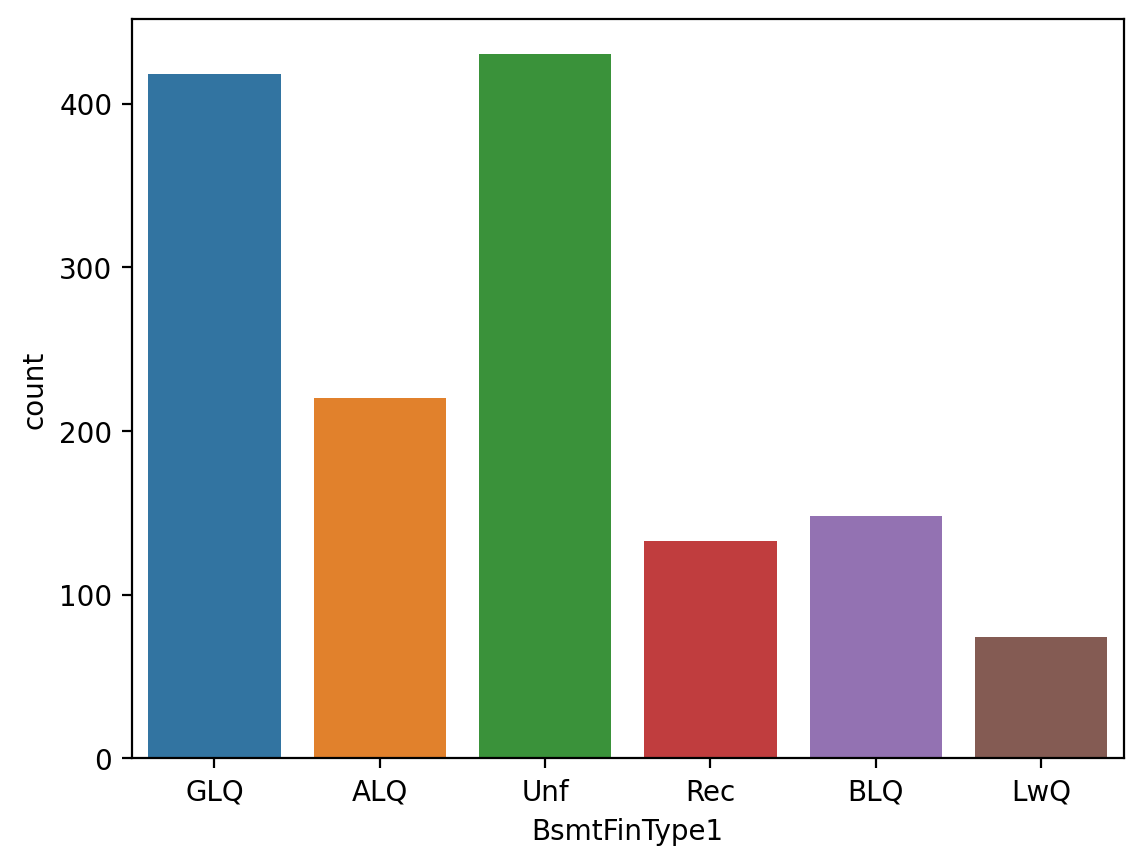

In [72]:
sns.countplot(x="BsmtFinType1", data=df);

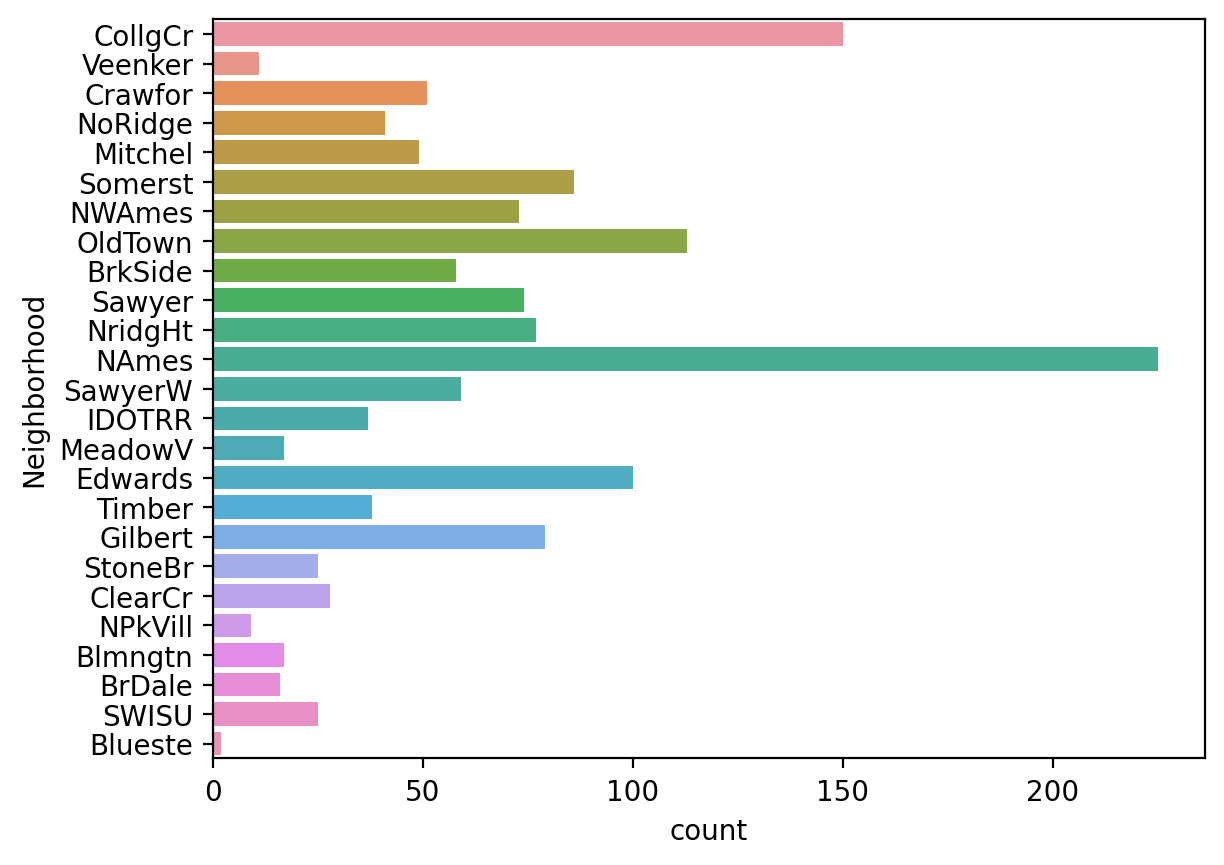

In [73]:
sns.countplot(y="Neighborhood", data=df);

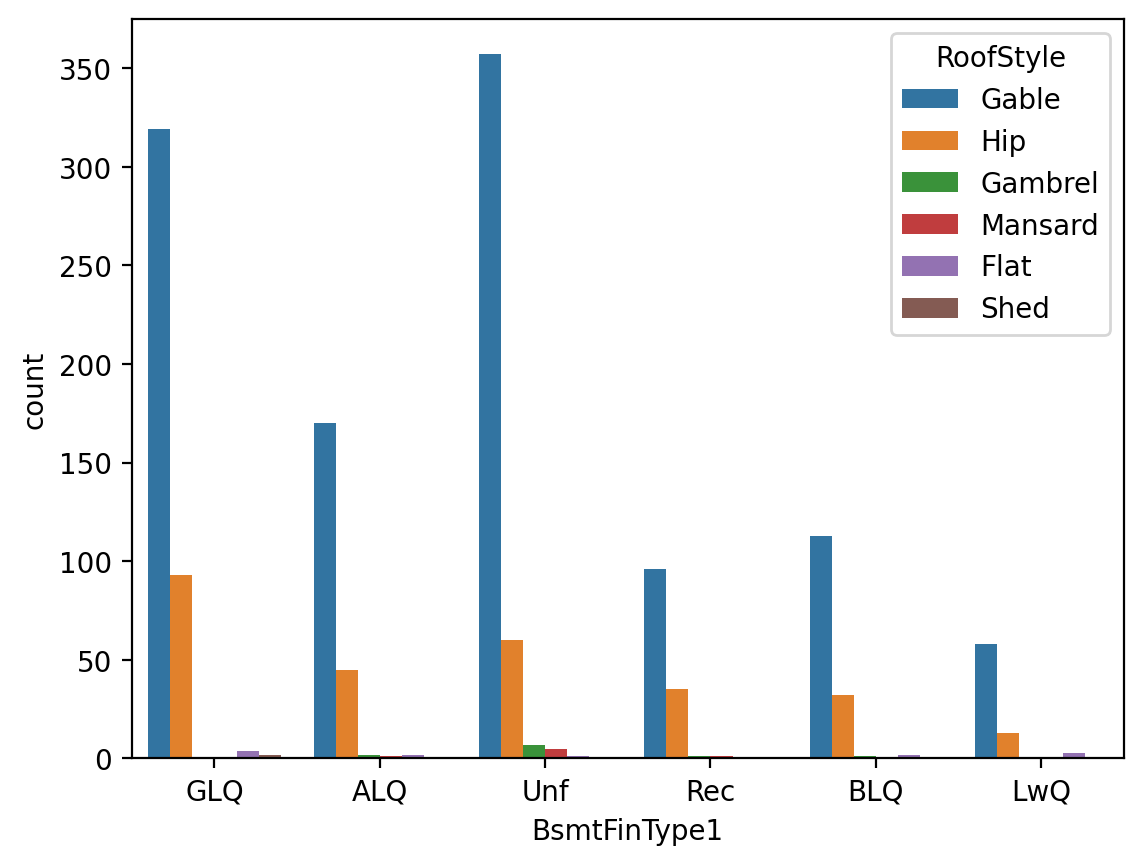

In [74]:
sns.countplot(x="BsmtFinType1", hue="RoofStyle", data=df);

In [ ]:
#sns.countplot(x="BsmtFinType1", hue="SalePrice", data=df);

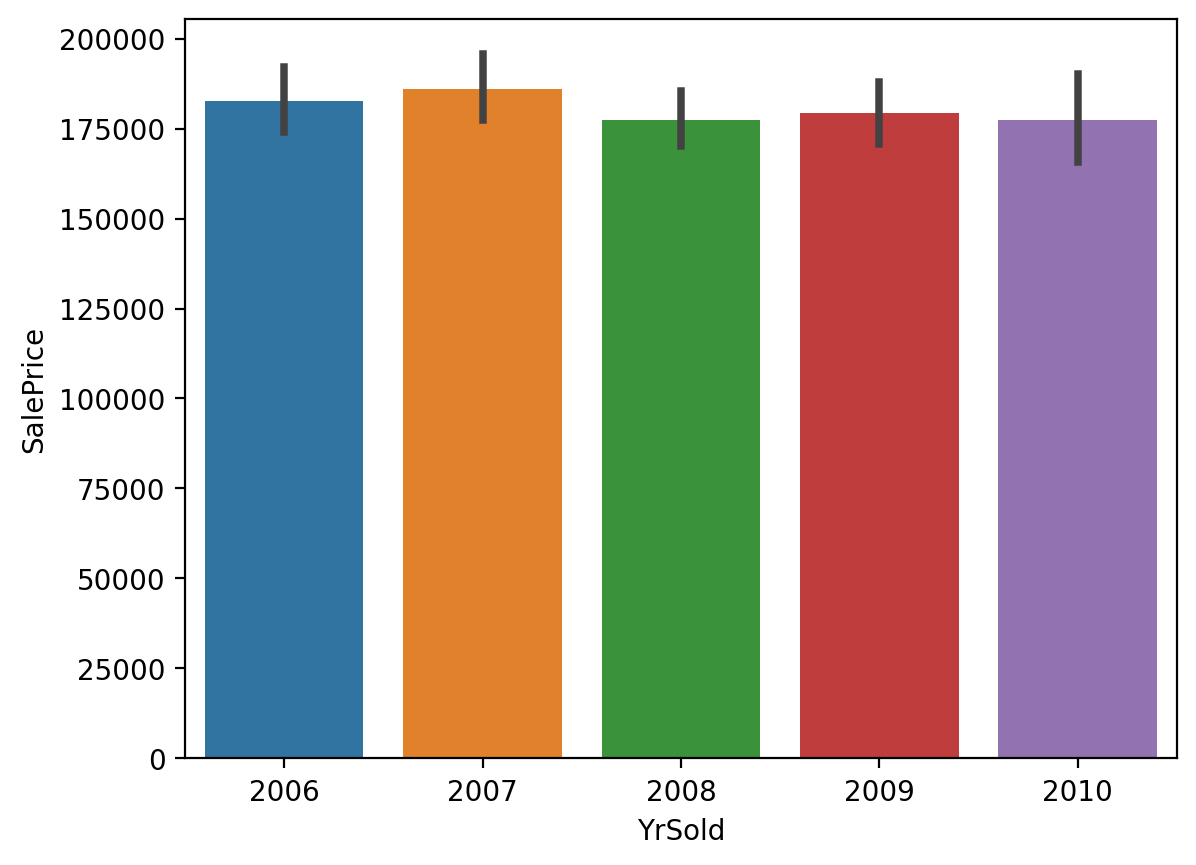

In [75]:
sns.barplot(x="YrSold", y="SalePrice", data=df);

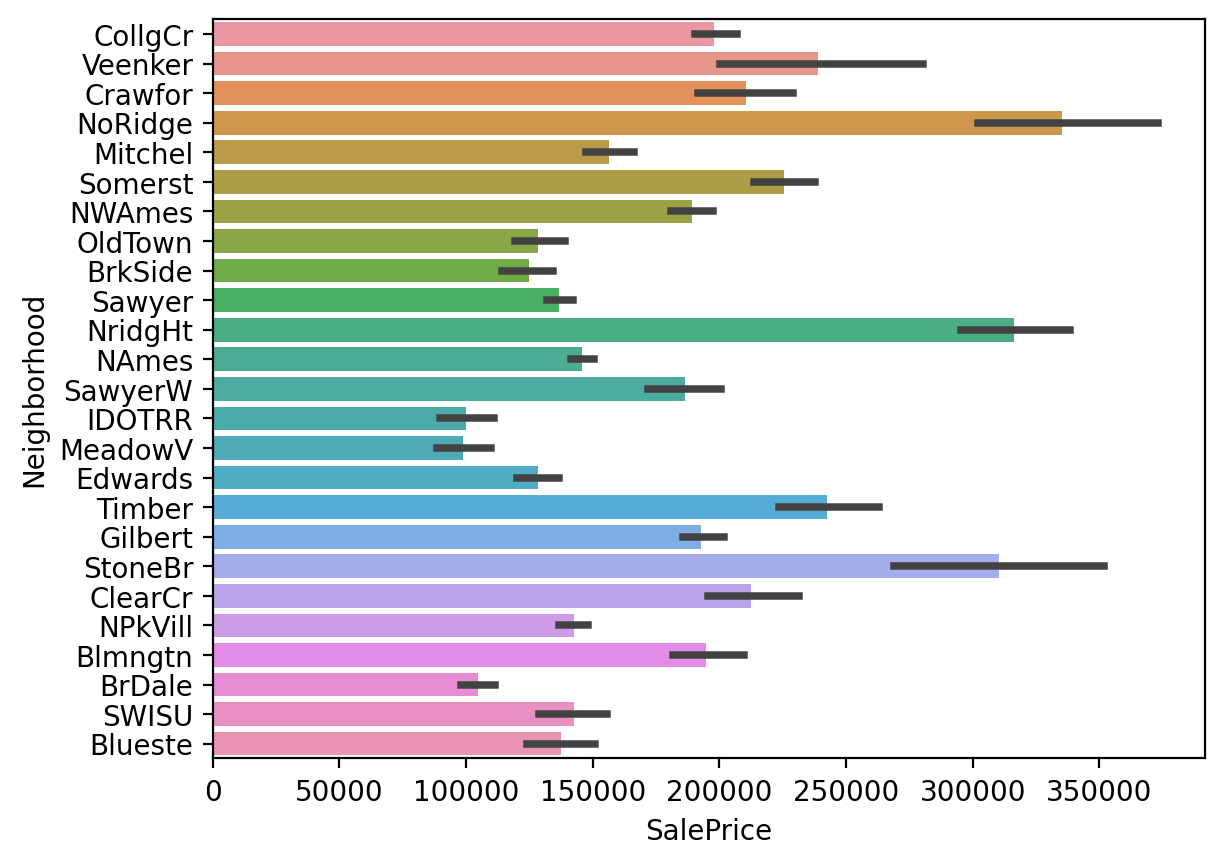

In [76]:
sns.barplot(y="Neighborhood", x="SalePrice", data=df);

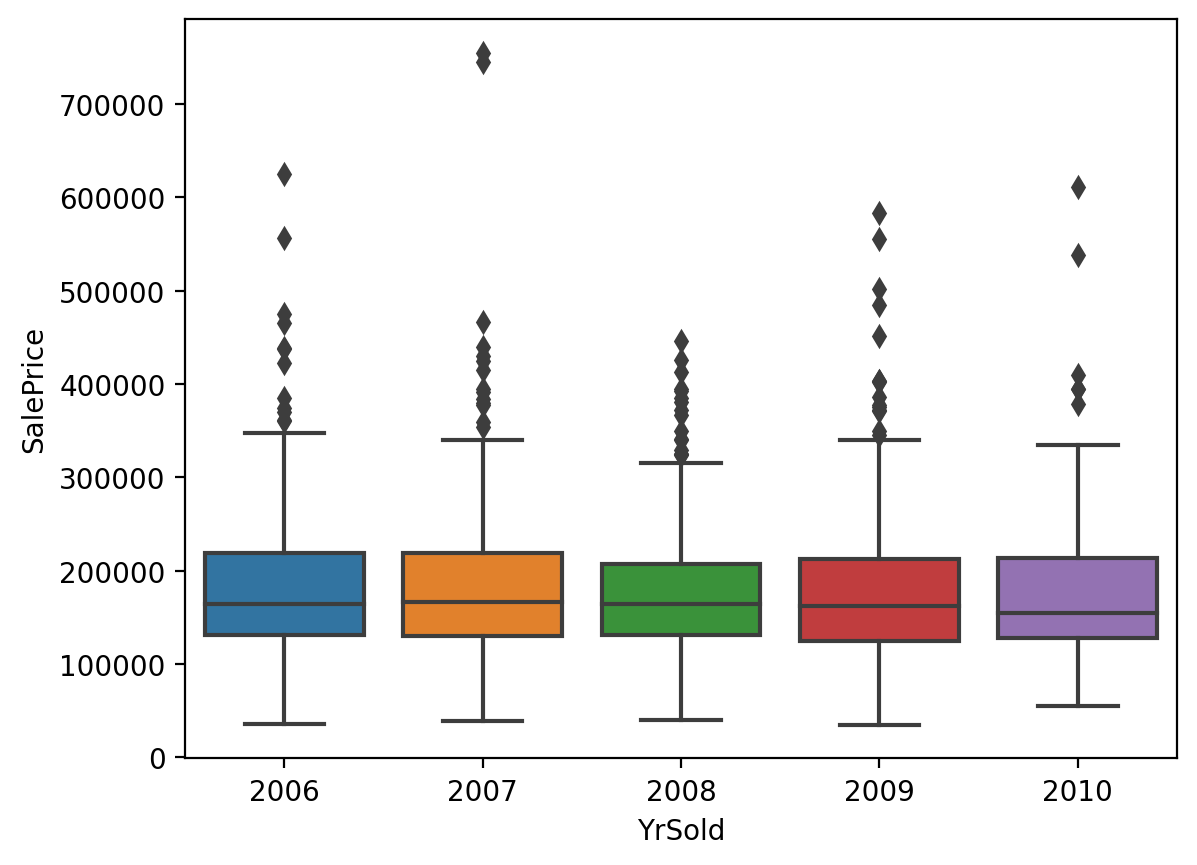

In [77]:
sns.boxplot(x="YrSold", y="SalePrice", data=df);

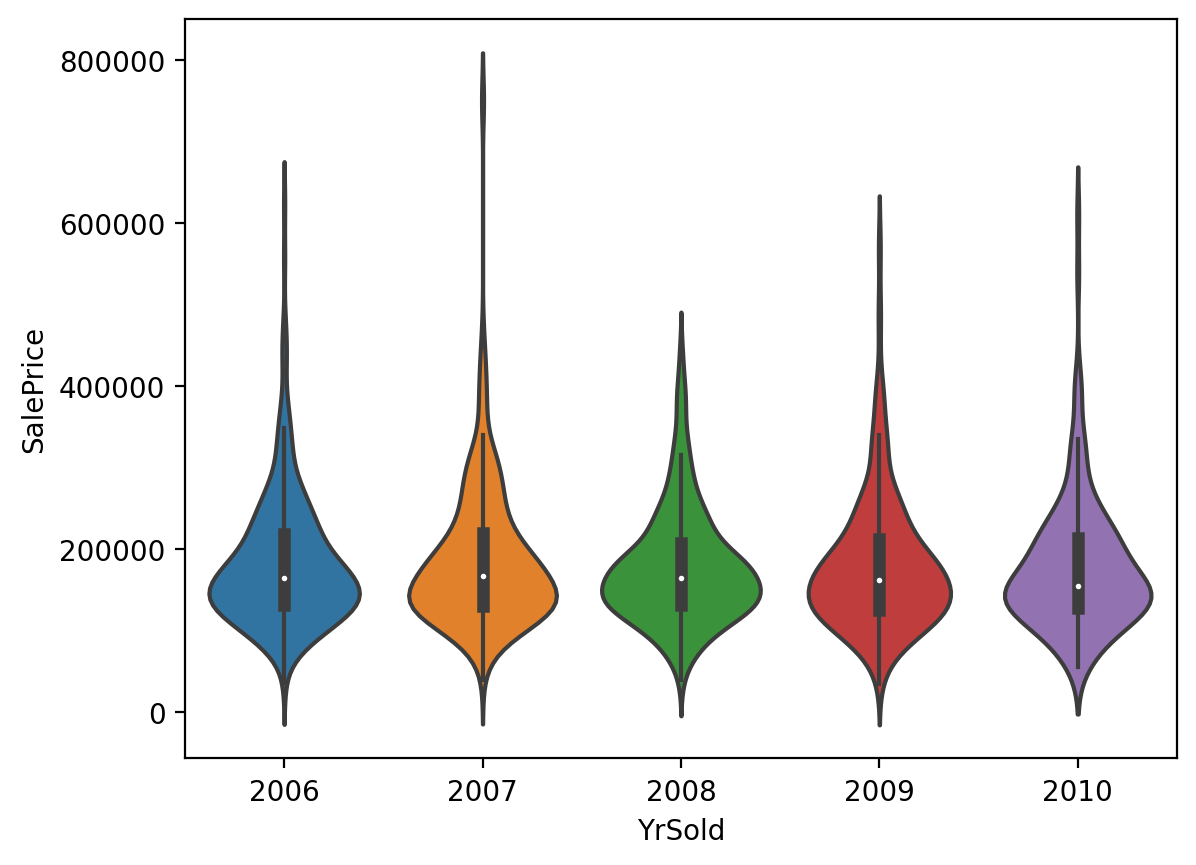

In [78]:
sns.violinplot(x="YrSold", y="SalePrice", data=df);